In [0]:
!unzip train.zip

In [0]:
!unzip test_data.zip

# **Image Preprocessing**

In [0]:
import numpy as np
import os
import matplotlib
from matplotlib import pyplot as plt, pyplot
import cv2
import random
import pickle

file_list = []
class_list = []

DATADIR = "/content/train/"

# All the categories you want your neural network to detect
CATEGORIES = ["other","modak"]

# The size of the images that your neural network will use
IMG_SIZE = 100

# Checking or all images in the data folder
for category in CATEGORIES :
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)

training_data = []

def create_training_data():
    for category in CATEGORIES :
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try :
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

create_training_data()

#random.shuffle(training_data)

X = [] #features
y = [] #labels

for features, label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

# Creating the files containing all the information about your model
pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

pickle_in = open("X.pickle", "rb")


### ***Modal Preparation***

In [73]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle
from keras.models import model_from_json
from keras.models import load_model
import matplotlib.pyplot as plt

# Opening the files about data
X = pickle.load(open("X.pickle", "rb"))
y = pickle.load(open("y.pickle", "rb"))

# normalizing data (a pixel goes from 0 to 255)
X = X/255.0

# Building the model
model = Sequential()
# 3 convolutional layers
model.add(Conv2D(32, (3, 3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# 2 hidden layers
model.add(Flatten())
model.add(Dense(128))
model.add(Activation("relu"))
model.add(Dropout(0.25))

model.add(Dense(128))
model.add(Activation("relu"))

# The output layer with 2 neurons, for 2 classes
model.add(Dense(2))
model.add(Activation("softmax"))

# Compiling the model using some basic parameters
model.compile(loss="sparse_categorical_crossentropy",
				optimizer="adam",
				metrics=["accuracy"])

# Training the model, with 40 iterations
# validation_split corresponds to the percentage of images used for the validation phase compared to all the images
history = model.fit(X, y, batch_size=32, epochs=40, validation_split=0.05)

# Saving the model
model_json = model.to_json()
with open("model.json", "w") as json_file :
	json_file.write(model_json)

model.save_weights("model.h5")
print("Saved model to disk")

model.save('CNN.model')



Train on 1177 samples, validate on 62 samples
Epoch 1/40
1177/1177 [==============================] - 17s 15ms/sample - loss: 0.6927 - acc: 0.5140 - val_loss: 0.8597 - val_acc: 0.0000e+00
Epoch 2/40
1177/1177 [==============================] - 16s 14ms/sample - loss: 0.6861 - acc: 0.5641 - val_loss: 0.8397 - val_acc: 0.1935
Epoch 3/40
1177/1177 [==============================] - 16s 14ms/sample - loss: 0.6611 - acc: 0.6160 - val_loss: 0.9132 - val_acc: 0.2742
Epoch 4/40
1177/1177 [==============================] - 17s 14ms/sample - loss: 0.6388 - acc: 0.6457 - val_loss: 0.7414 - val_acc: 0.5323
Epoch 5/40
1177/1177 [==============================] - 16s 14ms/sample - loss: 0.6170 - acc: 0.6720 - val_loss: 0.4411 - val_acc: 0.8226
Epoch 6/40
1177/1177 [==============================] - 16s 14ms/sample - loss: 0.5894 - acc: 0.6899 - val_loss: 0.4696 - val_acc: 0.8226
Epoch 7/40
1177/1177 [==============================] - 16s 14ms/sample - loss: 0.5610 - acc: 0.7145 - val_loss: 0.5364 - 

# **Prediction on test image**

other


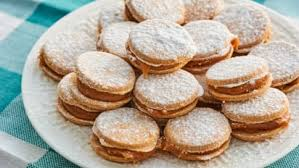

In [74]:
import cv2
import tensorflow as tf
from google.colab.patches import cv2_imshow
from matplotlib import pyplot

CATEGORIES = ["other","modak"]
def prepare(file):
    IMG_SIZE = 100
    img_array = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
model = tf.keras.models.load_model("CNN.model")
image1 = "/content/images567.jpg" 
image2 = '/content/OIP.jpg'
image =  prepare(image1)
prediction = model.predict([image])
prediction = list(prediction[0])
print(CATEGORIES[prediction.index(max(prediction))])
img_array = cv2.imread(image1)
cv2_imshow(img_array)

modak


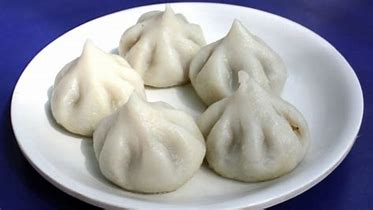

In [75]:
image2 = '/content/OIP.jpg'
image =  prepare(image2)
prediction = model.predict([image])
prediction = list(prediction[0])
print(CATEGORIES[prediction.index(max(prediction))])
img_array = cv2.imread(image2)
cv2_imshow(img_array)

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


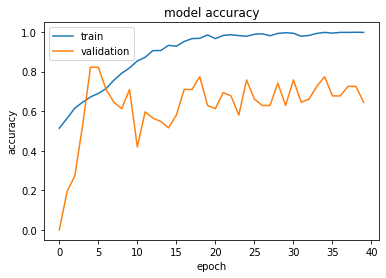

In [77]:
 #Printing a graph showing the accuracy changes during the training phase
print(history.history.keys())
plt.figure(1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')